In [1]:
import pandas as pd
df1 = pd.read_csv('../data/2008.csv')

### Select features needed for this model and drop all the unnecessary features

In [2]:
notUsedFeatures = ['DepDelay','TaxiIn', 'TaxiOut', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'NASDelay', 'WeatherDelay', 'CarrierDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'CancellationCode', 'Diverted', 'AirTime', 'FlightNum', 'TailNum']
df1.drop(notUsedFeatures, axis = 1, inplace=True)
#df2.drop(notUsedFeatures, axis = 1, inplace=True)
# df1 = df1[['UniqueCarrier', 'Origin', 'Dest', 'DepTime', 'DepDelay', 'CRSArrTime_Formatted', 'ArrTime_Formatted', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance']]
df1 = df1[['UniqueCarrier', 'Origin', 'Dest','CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime']]

In [3]:
df2 = df1.loc[0:1500]

In [56]:
#df2
df4 = df1.loc[1501:10000]

In [ ]:
#df2

In [5]:
df2.drop(['CRSDepTime','CRSArrTime','CRSElapsedTime', 'ActualElapsedTime','ArrTime'],axis=1,inplace=True)

/home/u6976/.conda/envs/tensorflow-35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
df2['ArrDelay'] = df2['ArrDelay'].apply(lambda x:1 if x>=7 else 0)

/home/u6976/.conda/envs/tensorflow-35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df2['ArrDelay']

0       0
1       0
2       1
3       0
4       1
5       1
6       1
7       0
8       0
9       0
10      0
11      1
12      0
13      1
14      0
15      1
16      1
17      0
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      1
27      0
28      0
29      0
       ..
1471    1
1472    1
1473    1
1474    1
1475    1
1476    1
1477    0
1478    1
1479    1
1480    0
1481    1
1482    0
1483    1
1484    1
1485    1
1486    1
1487    1
1488    1
1489    1
1490    0
1491    0
1492    1
1493    1
1494    1
1495    1
1496    1
1497    0
1498    0
1499    1
1500    1
Name: ArrDelay, Length: 1501, dtype: int64

In [8]:
#df2.notna()

In [7]:
import numpy as np
df2 = pd.concat([df2,pd.get_dummies(df2['UniqueCarrier'],drop_first=True,prefix="UniqueCarrier").astype(np.int8)],axis=1)
# df1 = pd.concat([df1,pd.get_dummies(df1['Origin'],drop_first=True,prefix="Origin")],axis=1)
# df1 = pd.concat([df1,pd.get_dummies(df1['Dest'],drop_first=True,prefix="Dest")],axis=1)
# #df1 = pd.concat([df1,pd.get_dummies(df1['DayOfWeek'],drop_first=True,prefix="DayOfWeek")],axis=1)
# df1 = pd.concat([df1,pd.get_dummies(df1['CRSDepTime'],drop_first=True,prefix="DepTime")],axis=1)
# df1 = pd.concat([df1,pd.get_dummies(df1['CRSArrTime'],drop_first=True,prefix="DepTime")],axis=1)
# df1 = pd.concat([df1,pd.get_dummies(df1['DepTime'],drop_first=True,prefix="DepTime")],axis=1)
# df1 = pd.concat([df1,pd.get_dummies(df1['ArrTime'],drop_first=True,prefix="DepTime")],axis=1)

### Preprocessing the data by turning necessary into dense matrix
**Features needed:**
- Unique Carrier
- Origin 
- Dest
- CRSDepTime: Scheduled departure time
- CRSArrTime: Scheduled arrival time
- ArrTime: Actual Arrival Time
- DepTime: Actual Departure Time
- DepDelay: Time delay at departure<br />
Because of memory issue, we only use the features that we think most important for the model: 
- UniqueCarrier
- Origin
- Dest
- DepTime

In [58]:
import numpy as np
df2 = pd.concat([df4,pd.get_dummies(df4['UniqueCarrier'],drop_first=True,prefix="UniqueCarrier").astype(np.int8)],axis=1)

In [40]:
#df2.drop(['UniqueCarrier'],axis=1,inplace=True)

In [ ]:
#df2['Origin']

In [8]:
df2 = pd.concat([df2,pd.get_dummies(df2['Origin'],drop_first=True,prefix="Origin").astype(np.int8)],axis=1)

In [59]:
df4 = pd.concat([df4,pd.get_dummies(df4['Origin'],drop_first=True,prefix="Origin").astype(np.int8)],axis=1)

In [9]:
df2 = pd.concat([df1,pd.get_dummies(df2['Dest'],drop_first=True,prefix="Dest").astype(np.int8)],axis=1)

In [45]:
#df1 = pd.concat([df1,pd.get_dummies(df1['CRSDepTime'],drop_first=True,prefix="CRSDepTime", sparse=True)],axis=1)

In [46]:
#df1 = pd.concat([df1,pd.get_dummies(df1['CRSArrTime'],drop_first=True,prefix="CRSArrTime", sparse=True)],axis=1)

In [10]:
df2 = pd.concat([df2,pd.get_dummies(df2['DepTime'],drop_first=True,prefix="DepTime").astype(np.int8)],axis=1)

In [48]:
#df1['DepTime']

In [14]:
#df2.drop(['Origin','Dest','DepTime', 'UniqueCarrier'],axis=1,inplace=True)
#df2.drop(['CRSDepTime','CRSArrTime','CRSElapsedTime', 'ActualElapsedTime'],axis=1,inplace=True)
#df2.drop(['ArrTime'],axis=1,inplace=True)
#df1['CRSArrTime']S
df2

,UniqueCarrier,Origin,Dest,CRSDepTime,DepTime,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,...,DepTime_2351.0,DepTime_2352.0,DepTime_2353.0,DepTime_2354.0,DepTime_2355.0,DepTime_2356.0,DepTime_2357.0,DepTime_2358.0,DepTime_2359.0,DepTime_2400.0
0,WN,IAD,TPA,1955,2003.0,2225,2211.0,-14.0,150.0,128.0,...,0,0,0,0,0,0,0,0,0,0
1,WN,IAD,TPA,735,754.0,1000,1002.0,2.0,145.0,128.0,...,0,0,0,0,0,0,0,0,0,0
2,WN,IND,BWI,620,628.0,750,804.0,14.0,90.0,96.0,...,0,0,0,0,0,0,0,0,0,0
3,WN,IND,BWI,930,926.0,1100,1054.0,-6.0,90.0,88.0,...,0,0,0,0,0,0,0,0,0,0
4,WN,IND,BWI,1755,1829.0,1925,1959.0,34.0,90.0,90.0,...,0,0,0,0,0,0,0,0,0,0
5,WN,IND,JAX,1915,1940.0,2110,2121.0,11.0,115.0,101.0,...,0,0,0,0,0,0,0,0,0,0
6,WN,IND,LAS,1830,1937.0,1940,2037.0,57.0,250.0,240.0,...,0,0,0,0,0,0,0,0,0,0
7,WN,IND,LAS,1040,1039.0,1150,1132.0,-18.0,250.0,233.0,...,0,0,0,0,0,0,0,0,0,0
8,WN,IND,MCI,615,617.0,650,652.0,2.0,95.0,95.0,...,0,0,0,0,0,0,0,0,0,0
9,WN,IND,MCI,1620,1620.0,1655,1639.0,-16.0,95.0,79.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df2['ArrDelay'] = df2['ArrDelay'].apply(lambda x:1 if x>=7 else 0)

In [12]:
df2.drop(['CRSDepTime','CRSArrTime','CRSElapsedTime', 'ActualElapsedTime','ArrTime'],axis=1,inplace=True)

In [13]:
df3=df2.loc[0:1500]

In [14]:
df3.drop(['UniqueCarrier', 'Origin', 'DepTime', 'Dest'], axis=1, inplace=True)

/home/u6976/.conda/envs/tensorflow-35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
df3

,ArrDelay,Dest_ALB,Dest_AMA,Dest_AUS,Dest_BDL,Dest_BHM,Dest_BNA,Dest_BOI,Dest_BUF,Dest_BUR,...,DepTime_2351.0,DepTime_2352.0,DepTime_2353.0,DepTime_2354.0,DepTime_2355.0,DepTime_2356.0,DepTime_2357.0,DepTime_2358.0,DepTime_2359.0,DepTime_2400.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3.drop('ArrDelay',axis=1), 
                                                    df3['ArrDelay'], test_size=0.3, 
                                                    random_state=101)

In [34]:
#df3['ArrDelay']
y_test

1051    1
1285    0
1271    0
778     1
1235    1
1195    1
1060    0
1081    0
858     1
218     0
904     1
552     1
1234    1
70      1
104     1
1052    1
668     1
501     1
1136    1
925     1
1192    1
1357    1
1019    1
183     0
628     1
614     1
2       1
990     1
647     0
295     1
       ..
918     1
988     0
1363    0
497     1
449     0
766     1
24      0
583     1
263     1
1385    0
692     1
723     1
1428    1
127     0
1286    0
812     1
1187    1
1367    0
1340    0
37      1
320     1
714     1
752     1
1314    1
790     1
412     1
1039    1
1293    1
485     1
729     1
Name: ArrDelay, Length: 451, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [114]:
import pickle
with open('logmodel.pkl', 'wb') as fid:
    pickle.dump(logmodel, fid,2) 

In [115]:
cat = df3.drop('ArrDelay',axis=1)
index = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index, fid,2)  

In [22]:
from sklearn.metrics import log_loss
log_loss(y_test, predictions) 

12.559766032947993

### Accuracy Score

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.63636363636363635

In [28]:
X_test.shape

(451, 1500)

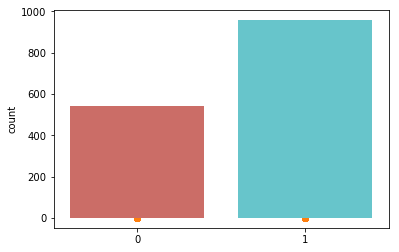

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.scatter(y_test, predictions)
# plt.plot(accuracy_score, color="r")
# plt.show()
sns.countplot(x=df3['ArrDelay'].values,data=df3, palette='hls')
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.41      0.21      0.27       150
          1       0.68      0.85      0.76       301

avg / total       0.59      0.64      0.60       451



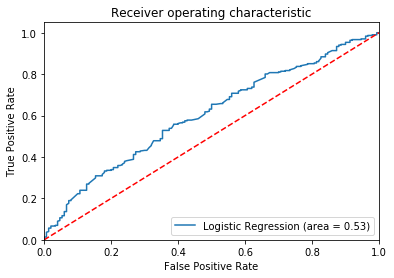

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')
plt.show()

In [60]:
#plt.savefig('logmodel_ROC.png')